<a href="https://colab.research.google.com/github/Ojas-Sri/Credit-Card-Default-Prediction/blob/main/Python%20Notebooks/Credit_card_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="yellow">Credit Card Default (First NoteBook)</font>

## <font color="orange"> Outline of Dataset </font>


There are 25 variables:
*   <font color="aqua">ID: ID of each client</font>

*   <font color="aqua">LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)</font>
*    <font color="aqua">SEX: Gender (1=Male, 2=Female)</font>

*    <font color="aqua">EDUCATION: (1=Graduate School, 2=University, 3=High School, 4=Others, 5=Unknown, 6=Unknown)</font>

*    <font color="aqua">MARRIAGE: Marital status (1=Married, 2=Single, 3=Others) </font>

*    <font color="aqua">AGE: Age (in years)
</font>
<br>

*   <font color="orange">PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)</font>
 *  PAY_2: Repayment status in August, 2005 (scale same as above)
 * PAY_3: Repayment status in July, 2005 (scale same as above)
 * PAY_4: Repayment status in June, 2005 (scale same as above)
 *  PAY_5: Repayment status in May, 2005 (scale same as above)
 *   PAY_6: Repayment status in April, 2005 (scale same as above)
<br>

<br>

*    <font color="aqua">BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)</font>
 *    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
 *    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
 *    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
 *    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
 *    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
<br>

<br>


*    <font color="orange">PAY_AMT1: Amount of previous payment in Sept, 2005
 *    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
 *    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
 *    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
 *    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
 *    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

 <br>

*    default.payment.next.month: Default payment (1=yes, 0=no)

## Importing Libraries

In [ ]:
!pip install ggplot -q

In [ ]:
# Import basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#from ggplot import *
%matplotlib inline

##Importing Data

In [ ]:
#Integrating Gdrive
from google.colab import drive
drive.mount('/content/drive/')

# Run this and click on the link to get the Authorization code and then head over to
# files to Gdrive mounte



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
 location = "/content/drive/My Drive/Minor Project (Machine Learning)/Credit Default /UCI_Credit_Card.csv"

 df = pd.read_csv(location)
 df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
17648,17649,90000.0,2,3,2,42,0,0,0,0,0,0,91240.0,92795.0,93557.0,47166.0,48406.0,49695.0,4895.0,4806.0,1547.0,3000.0,3000.0,1720.0,0
12712,12713,360000.0,1,1,2,33,-1,2,0,0,2,0,5971.0,5732.0,6465.0,9465.0,9290.0,4209.0,0.0,1000.0,3000.0,0.0,5000.0,3780.0,0
14506,14507,10000.0,1,2,1,35,0,0,0,0,0,0,9159.0,10004.0,9722.0,10044.0,9856.0,10285.0,1160.0,1139.0,1241.0,345.0,580.0,180.0,0
17296,17297,400000.0,2,2,2,32,-2,-2,-2,-2,-2,-2,6464.0,-270.0,-770.0,-761.0,-2710.0,187552.0,1692.0,0.0,9.0,11.0,194541.0,7015.0,1
23786,23787,20000.0,2,3,1,51,1,2,0,0,0,0,15399.0,14859.0,15913.0,17033.0,17466.0,19635.0,0.0,1600.0,1700.0,1000.0,2600.0,0.0,1


### Descriptive Statistics

In [ ]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
# Generate descriptive statistics.
# Descriptive statistics include those that summarize the central tendency, dispersion 
# and shape of a dataset’s distribution, excluding NaN values.

# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


<font color="yellow">
No missing data, but a few anomalous things:<br><br>
*EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.<br>
*MARRIAGE has a label 0 that is undocumented

</font>

In [ ]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


<font color="yellow"><br>
*They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0. But we will get to that later.*
</font>


# Bill Statement description


In [ ]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


<font color="yellow">
Negative values can be interpreted as credit? Has to be investigated


In [ ]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<font color="yellow">
The range is very broad, Investigation required.<br>
Two columns bother me because are poorly labeled.


In [ ]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# I am interested in having a general idea of the default probability
df.def_pay.sum() / len(df.def_pay)

0.2212

In [ ]:
# Other ways of getting this kind of numbers (as a reference for newbies like myself)
print(df.shape)
print(df.shape[0])
print(df.def_pay.count())
print(len(df.axes[1]))

(30000, 25)
30000
30000
25




---


## <font color="orange">Blind machine learning</font>
<br>
I define it blind because I will just throw everything I have in them and nothing more than that. My hope is to see significant improvements once that I will engineer some features.<br><br>
This is a classification problem and this means that we can use the following algorithms:

    Logistic regression
    Decision tree
    Random forest
    Support Vector Classifications
    Stocastic Gradient Descend
    Nearest Neighbours Classifiers
    Gaussian Process Classification
    Other ensemble
    Neural Network Models
    XGBoost

Since the plan is mostly to use a try and error approach to see how things goes, I will first start on those that I am more familiar with: Decision tree.

---



---
###Decision tree

The Tree is very easy to use and imagine, it can handle both numerical and categorical variables, but it is easy to fall into the trap of overfitting (i.e. creating a very complex model that perfectly describes your training set but fails in predicting). It is also said to be senstive to small changes in the data, leading to different results. For this reason, it is common to use ensembles such as Random Forest to avoid this risk.

There are a few parameters to be settle for the classifier, such as the function to determine the quality of a split, or how deep the tree has to be. We will first test it with a random choice of those parameters and then see a better process.

---


In [ ]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [ ]:
# create the target variable
y = df['def_pay'].copy()
y.sample(5)

17161    0
22642    0
20405    0
15139    1
21760    1
Name: def_pay, dtype: int64

In [ ]:
# create the features, which now will be everything in the original df
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = df[features].copy()
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [ ]:
# split the df into train and test, it is important these two do not communicate during the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# this means we will train on 80% of the data and test on the remaining 20%

In [ ]:
#check that the target is not far off
print(df.def_pay.describe())
print("---------------------------")
print(y_train.describe())
print("---------------------------")
print(y_test.describe())

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: def_pay, dtype: float64
---------------------------
count    24000.000000
mean         0.221792
std          0.415460
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: def_pay, dtype: float64
---------------------------
count    6000.000000
mean        0.218833
std         0.413490
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: def_pay, dtype: float64


In [ ]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=4) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.8118333333333333

<font color="yellow"> Not bad for a beginner, 81% is a result you just get with a random choices on the parameters. On this matter, let's see an overfitting example

In [ ]:
classifier = DecisionTreeClassifier(max_depth=100, random_state=14) 
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

0.7231666666666666



---


So it is easy to mess up your model, apparently. There is a better way that I know to get your parameters right, which is to use GridSearchCV. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.<br>
Be aware that the more you complicate the grid, the longer it takes, because it is running it every time with a different combination of parameters.<br><br>
It is a good chance to discuss the three parameters that I understand criterion can be<ul>
<li> gini (measures how often a randomly chosen element would be incorrectly identified) or entropy (measures the information contained by each attribute, thus we estimate the reduction in entropy due to sorting on the attribute)
<li>max depth is the maximum amount of steps the tree should do
<li>max leaf nodes maximum number of nodes
<li>min sample split a limit to stop further splitting, useful to avoid overfitting
</ul>

---




In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.8212916666666666


In [ ]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


0.8211666666666667



---


We got a +0.07% in accuracy just by choosing the right parameters..

Another thing we should do is to cross validate. Actually, it is kind of included in the gridsearch but it is still unclear to me and we get a chance of exploring another tool of the sklearn library: Kfold

---

In [ ]:
from sklearn.model_selection import KFold
!pip install git+https://github.com/yhat/ggplot.git
!pip install plotnine -q

  Cloning https://github.com/yhat/ggplot.git to /tmp/pip-req-build-l72jeele
  Running command git clone -q https://github.com/yhat/ggplot.git /tmp/pip-req-build-l72jeele
  Created wheel for ggplot: filename=ggplot-0.11.5-py2.py3-none-any.whl size=2068097 sha256=b9343fc105d1ffb5287629fba1437d302436c73a47fcda75f3537532beb7adde
  Stored in directory: /tmp/pip-ephem-wheel-cache-ifzhsc0o/wheels/87/87/bf/f1367811c186d55352c82d6501a969d3c6b97e97bcce8b7b48
Successfully built ggplot


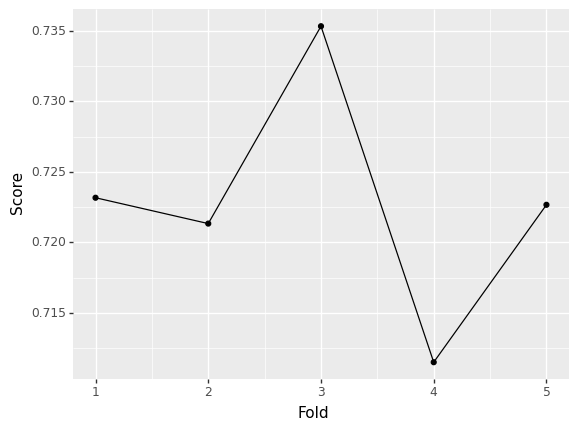

<ggplot: (-9223363278527335280)>

In [ ]:
#########LOOK INTO GGPLOT ISSUE : SOLVED
import ggplot
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance = pd.DataFrame({'Score':scr,'Fold':fold})
# let's see what we have with ggplot
(ggplot(performance)+aes(x='Fold',y='Score') + geom_point()+ geom_line())


In [ ]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(classifier, features)

,feat,score
5,PAY_1,0.162131
4,AGE,0.078423
11,BILL_AMT1,0.063839
0,LIMIT_BAL,0.057810
19,PAY_AMT3,0.055951
22,PAY_AMT6,0.055684
16,BILL_AMT6,0.049995
21,PAY_AMT5,0.046998
17,PAY_AMT1,0.046870
12,BILL_AMT2,0.045978
